Vaishnavi Karma
B.Tech VII sem
Roll No. 0873CS211115


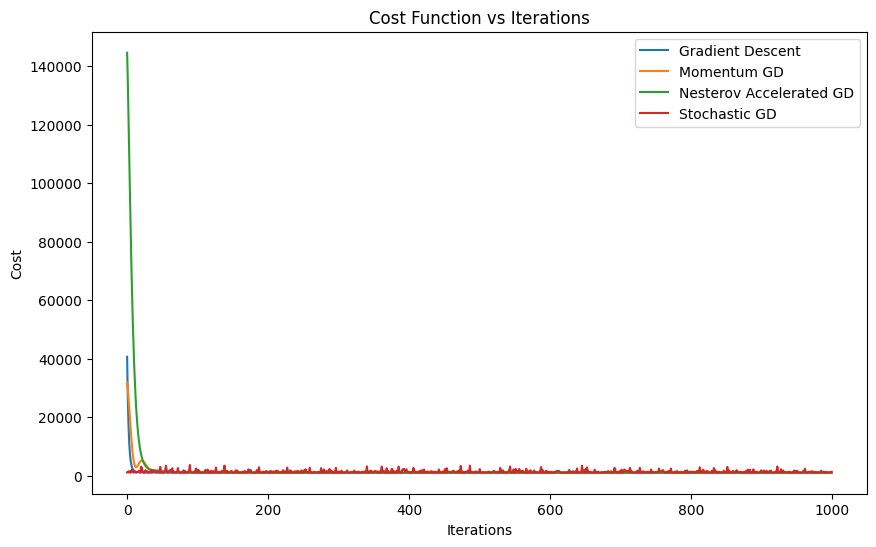

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Generate synthetic data for a simple linear regression y = 3x + 2

print("Vaishnavi Karma")
print("B.Tech VII sem")
print("Roll No. 0873CS211115")
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples
y = 3 * X + 2 + np.random.randn(100, 1) * 0.5  # Adding some noise to the data

# Adding bias term to X (X0 = 1 for each sample)
X_b = np.c_[np.ones((100, 1)), X]  # Adding X0 = 1 for bias term (intercept)
# Mean Squared Error Cost Function
def cost_function(theta, X, y):
    m = len(y)
    return (1/2*m) * np.sum((X.dot(theta) - y)**2)

# Gradient of the cost function
def compute_gradient(theta, X, y):
    m = len(y)
    return (1/m) * X.T.dot(X.dot(theta) - y)
def gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    theta = np.random.randn(2, 1)  # Random initialization
    m = len(y)
    cost_history = []

    for i in range(n_iterations):
        gradients = compute_gradient(theta, X, y)
        theta -= learning_rate * gradients
        cost_history.append(cost_function(theta, X, y))

    return theta, cost_history
def momentum_gd(X, y, learning_rate=0.1, n_iterations=1000, beta=0.9):
    theta = np.random.randn(2, 1)  # Random initialization
    m = len(y)
    v = np.zeros((2, 1))  # Initialize velocity
    cost_history = []

    for i in range(n_iterations):
        gradients = compute_gradient(theta, X, y)
        v = beta * v + (1 - beta) * gradients  # Update velocity
        theta -= learning_rate * v
        cost_history.append(cost_function(theta, X, y))

    return theta, cost_history
def nesterov_accelerated_gd(X, y, learning_rate=0.1, n_iterations=1000, beta=0.9):
    theta = np.random.randn(2, 1)  # Random initialization
    m = len(y)
    v = np.zeros((2, 1))  # Initialize velocity
    cost_history = []

    for i in range(n_iterations):
        lookahead_theta = theta - beta * v  # Look ahead
        gradients = compute_gradient(lookahead_theta, X, y)
        v = beta * v + (1 - beta) * gradients
        theta -= learning_rate * v
        cost_history.append(cost_function(theta, X, y))

    return theta, cost_history
def stochastic_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    theta = np.random.randn(2, 1)  # Random initialization
    m = len(y)
    cost_history = []

    for i in range(n_iterations):
        for j in range(m):  # Update for each data point (stochastic)
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            gradients = 2 * X_i.T.dot(X_i.dot(theta) - y_i)
            theta -= learning_rate * gradients
        cost_history.append(cost_function(theta, X, y))

    return theta, cost_history
n_iterations = 1000
learning_rate = 0.1

# Gradient Descent
theta_gd, cost_gd = gradient_descent(X_b, y, learning_rate, n_iterations)

# Momentum-based Gradient Descent
theta_mom, cost_mom = momentum_gd(X_b, y, learning_rate, n_iterations)

# Nesterov Accelerated Gradient Descent
theta_nag, cost_nag = nesterov_accelerated_gd(X_b, y, learning_rate, n_iterations)

# Stochastic Gradient Descent
theta_sgd, cost_sgd = stochastic_gradient_descent(X_b, y, learning_rate, n_iterations)

# Plotting the cost history for comparison
plt.figure(figsize=(10,6))
plt.plot(cost_gd, label="Gradient Descent")
plt.plot(cost_mom, label="Momentum GD")
plt.plot(cost_nag, label="Nesterov Accelerated GD")
plt.plot(cost_sgd, label="Stochastic GD")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations")
plt.legend()
plt.show()
